In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install openpyxl


In [3]:
!pip install -q --upgrade imbalanced-learn


import file

In [4]:
data=pd.read_csv('/kaggle/input/healthcare-dataset-stroke-data/healthcare-dataset-stroke-data.csv')
data.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


checking if there are wrong data types

In [5]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
data.shape

(5110, 12)

checking the typos of categorical and binary features

In [7]:
print(data['gender'].value_counts())
print(data['ever_married'].value_counts())
print(data['work_type'].value_counts())
print(data['Residence_type'].value_counts())
print(data['smoking_status'].value_counts())
print(data['stroke'].value_counts())


gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64
stroke
0    4861
1     249
Name: count, dtype: int64


**droping rare features**

droping the rows that contain this feature

In [8]:
data=data[data['gender']!='Other']

**droping unnecessary columns** 

In [9]:
data=data.drop(['id'],axis=1)

In [10]:
data.shape

(5109, 11)

**checking for duplicates and NANs**

In [11]:
data.duplicated().sum()

0

In [12]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**we have to separate between features and target**

In [13]:
x=data['stroke']
data=data.drop('stroke',axis=1)

**handling outliers of numerical features**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


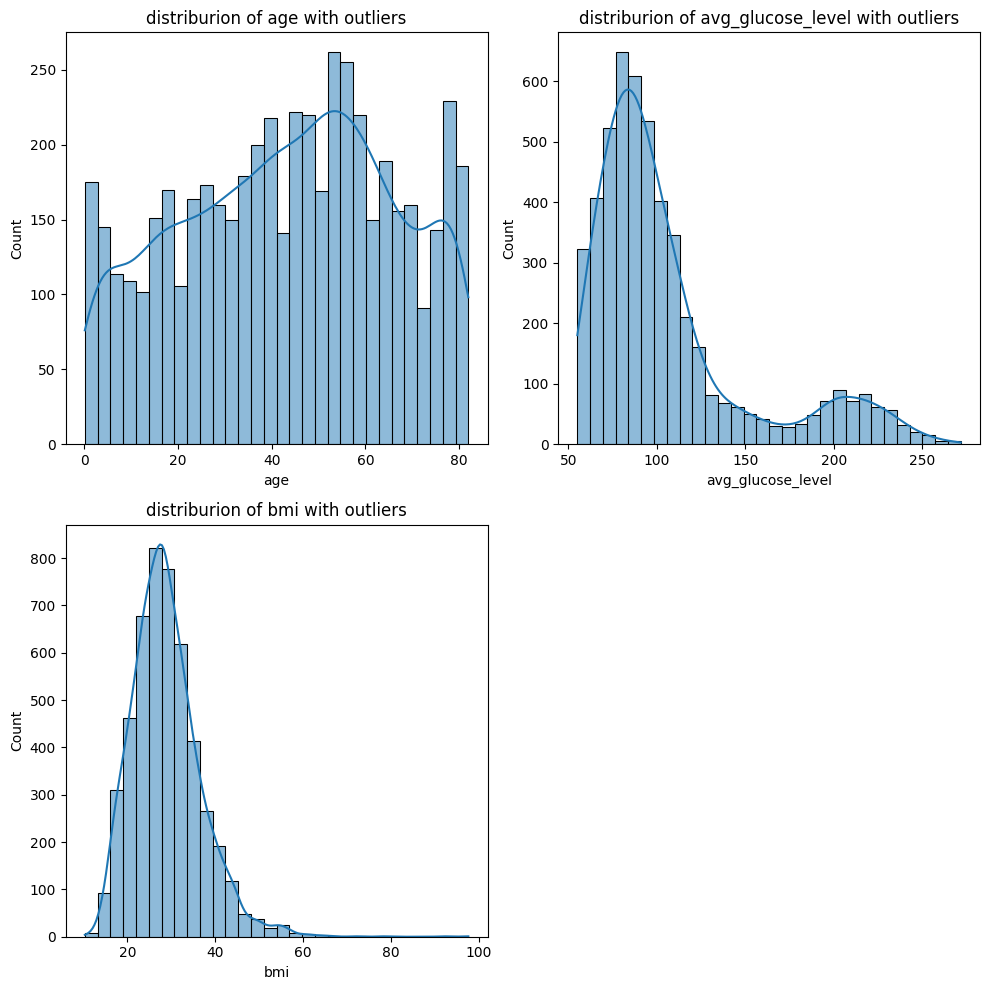

In [14]:
features=['age','avg_glucose_level','bmi']
plt.figure(figsize=(2*5,2*5))
for i,feature in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.histplot(data[feature],kde=True,bins=30)
    plt.title(f'distriburion of {feature} with outliers')
plt.tight_layout()
plt.show()

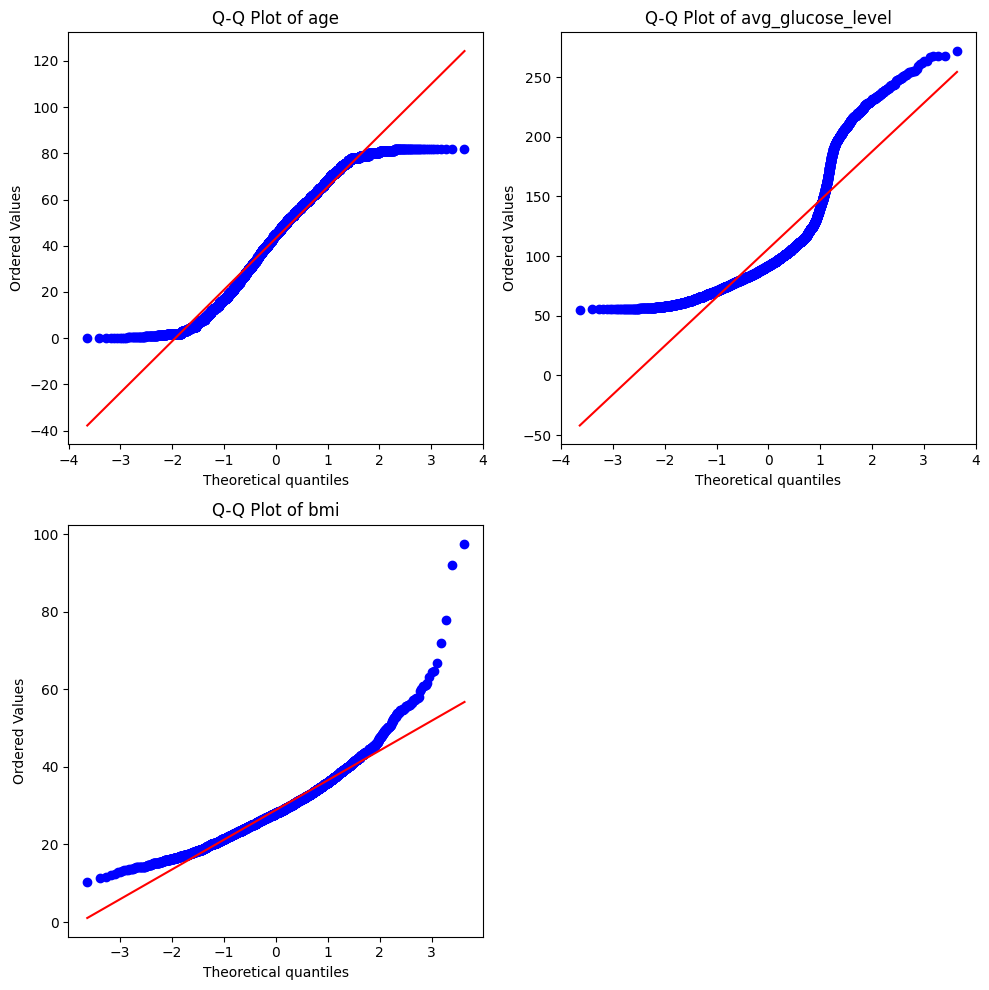

In [15]:
from scipy.stats import probplot,normaltest,boxcox
plt.figure(figsize=(2*5,2*5))

for i,feature in enumerate(features):
    plt.subplot(2,2,i+1)
    clean_data = data[feature].dropna()  # Remove NaNs
    probplot(clean_data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {feature}')
plt.tight_layout()
plt.show()


**statistical test for normality**

In [16]:

for col in ['age', 'avg_glucose_level', 'bmi']:
    stat, p = normaltest(data[col].dropna()) #drop NANs 
    print(f"{col}: p = {p} => {'Normal' if p > 0.05 else 'Not normal'}")


age: p = 6.466817238449553e-244 => Not normal
avg_glucose_level: p = 2.1840552435286905e-289 => Not normal
bmi: p = 2.2866990701303943e-222 => Not normal


**testing available transformations to lead the data distribution to be normal**


first: log transform

In [17]:
for col in ['age', 'avg_glucose_level', 'bmi']:
    data_log=np.log(data[col])
    stat,p=normaltest(data_log.dropna())
    print(f"{col}: p = {p} => {'Normal' if p > 0.05 else 'Not normal'}")


age: p = 0.0 => Not normal
avg_glucose_level: p = 1.6730203160719552e-110 => Not normal
bmi: p = 0.007865024027584634 => Not normal


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


still not normal

second: square root transform

In [18]:
for col in ['age', 'avg_glucose_level', 'bmi']:
    data_root=np.sqrt(data[col])
    stat,p=normaltest(data_root.dropna())
    print(f"{col}: p = {p} => {'Normal' if p > 0.05 else 'Not normal'}")


age: p = 1.7461244139885575e-91 => Not normal
avg_glucose_level: p = 9.110756926536175e-198 => Not normal
bmi: p = 4.8305277646046754e-57 => Not normal


failed to be normal


third: boxcox transform

In [19]:

for col in ['age', 'avg_glucose_level', 'bmi']:
    col_data = data[col]
    transformed, lam = boxcox(col_data.dropna())  

    stat, p = normaltest(transformed)      #transformed is a numpy array so we can't type transformed.dropna()---> .dropna() is a function in pandas
    print(f"{col}: p = {p:.4f} => {'Normal' if p > 0.05 else 'Not normal'}")


age: p = 0.0000 => Not normal
avg_glucose_level: p = 0.0000 => Not normal
bmi: p = 0.0080 => Not normal


failed agian to normalize the data

**now handling outliers of the non normal distributed data**

visualizing the boxplot of the age , avg_glucose_level and bmi

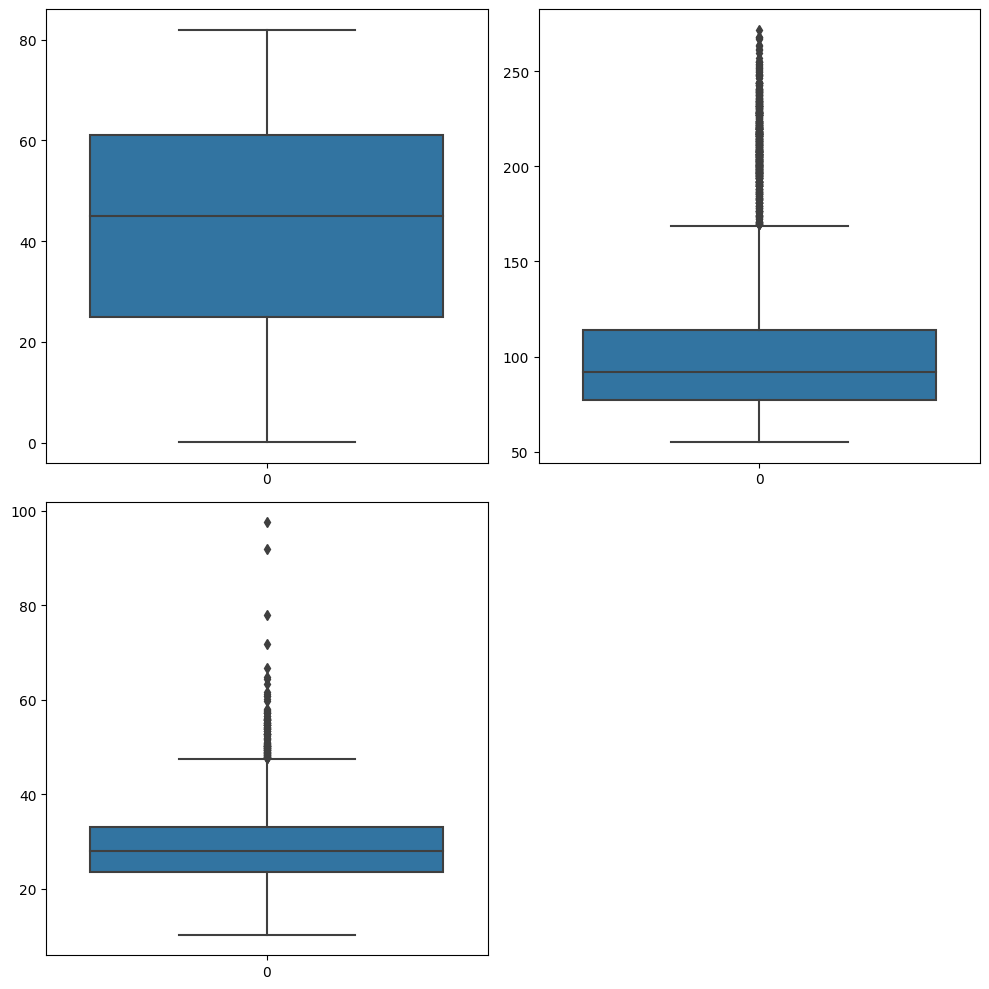

In [20]:
features=['age','avg_glucose_level','bmi']
plt.figure(figsize=(2*5,2*5))
for i,feature in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.boxplot(data[feature])
plt.tight_layout()
plt.show()

as we can see age hasn't outliers

In [21]:
for feature in ['bmi','avg_glucose_level']:    
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 2 * IQR       #extending the range fo reduce outliers
    upper_bound = Q3 + 2 * IQR    
    outliers_df=data[(data[feature]>upper_bound)|(data[feature]<lower_bound)]
outliers_df

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown
14,Female,79.0,0,1,Yes,Private,Urban,214.09,28.2,never smoked
16,Male,64.0,0,1,Yes,Private,Urban,191.61,37.5,smokes
...,...,...,...,...,...,...,...,...,...,...
5035,Female,78.0,0,0,Yes,Private,Urban,203.36,28.7,formerly smoked
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes
5061,Male,41.0,0,0,Yes,Private,Urban,223.78,32.3,never smoked
5062,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked


**returning a cleaned data frame**

In [22]:
for feature in ['bmi','avg_glucose_level']:    
    df_cleaned=data[(data[feature]<=upper_bound)&(data[feature]>=lower_bound)]
df_cleaned

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


In [23]:
df_cleaned.shape

(4566, 10)

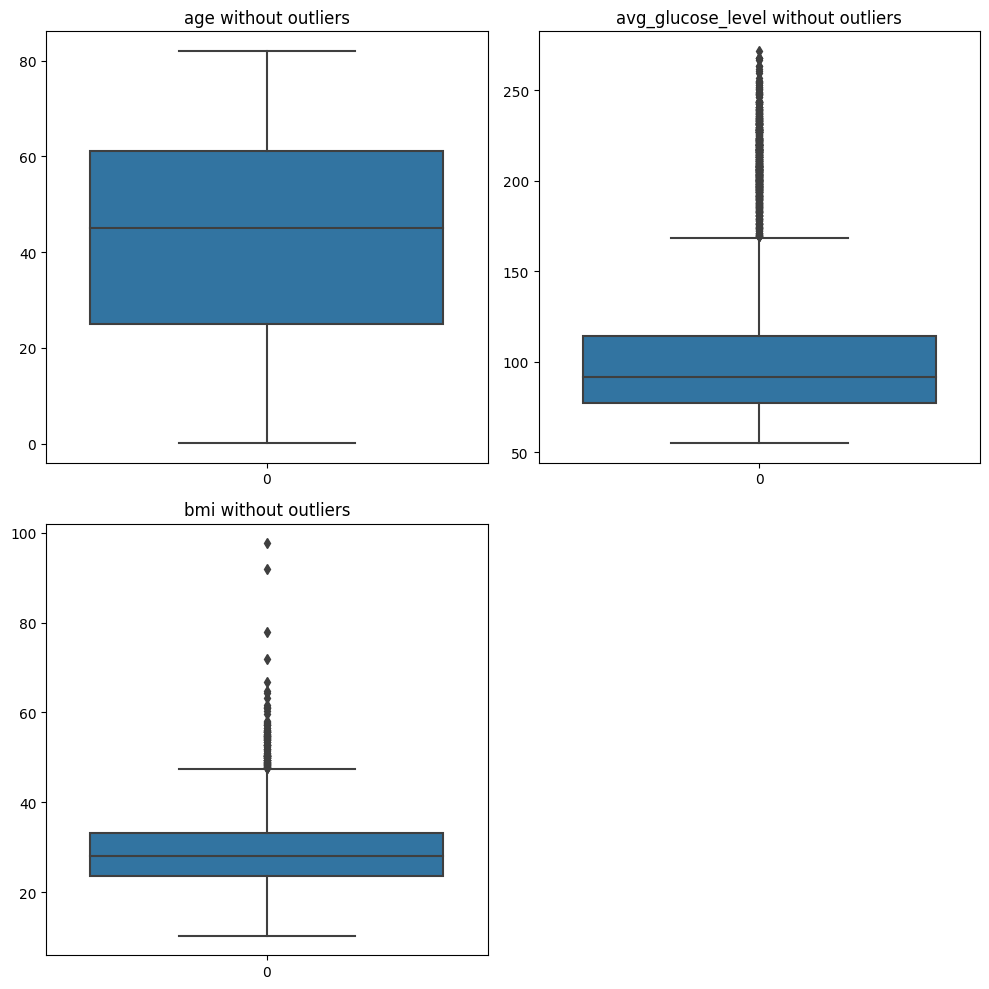

In [24]:
features=['age','avg_glucose_level','bmi']
plt.figure(figsize=(2*5,2*5))
for i,feature in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.boxplot(data[feature])
    plt.title(f'{feature} without outliers')
plt.tight_layout()
plt.show()

**encoding the categories for an upcoming step(missing values)
KNN needs all the data to be numerical**

In [25]:
data_encoded=pd.get_dummies(df_cleaned,columns=['gender','ever_married','work_type','Residence_type','smoking_status'],drop_first=False)
#drop_first=true will cause missing a dimension so the distance will be wrong   
data_encoded[['ever_married_No','gender_Male','gender_Female'	,'Residence_type_Rural',	'ever_married_Yes',	'work_type_Never_worked',	'work_type_Private',	'work_type_Self-employed',	'work_type_children',	'Residence_type_Urban',	'smoking_status_formerly smoked'	,'smoking_status_never smoked'	,'smoking_status_smokes','smoking_status_Unknown']]=data_encoded[['gender_Male','gender_Female'	,'Residence_type_Rural',	'ever_married_Yes',	'work_type_Never_worked',	'work_type_Private',	'work_type_Self-employed',	'work_type_children',	'Residence_type_Urban',	'smoking_status_formerly smoked'	,'smoking_status_never smoked'	,'smoking_status_smokes','smoking_status_Unknown','ever_married_No']].astype(int)  
data_encoded.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2,80.0,0,1,105.92,32.5,1,0,1,0,False,1,0,0,0,1,0,0,1,0,0
3,49.0,0,0,171.23,34.4,0,1,0,0,False,1,0,0,1,1,0,0,0,1,0
4,79.0,1,0,174.12,24.0,1,1,0,0,False,0,1,0,0,1,0,0,1,0,0
5,81.0,0,0,186.21,29.0,0,0,1,0,False,1,0,0,1,1,1,0,0,0,0
6,74.0,1,1,70.09,27.4,1,0,1,0,False,1,0,0,0,1,0,0,1,0,0


**data has to be scaled before KNN for features equality**

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(data_encoded),columns=data_encoded.columns)
#output of minmaxscaler is numpy array

**handling missing values so we can after that check the features redundancy that requires no missing values**

In [27]:
from sklearn.impute import KNNImputer

In [28]:
imputer = KNNImputer(n_neighbors=5)  
data_imputed = imputer.fit_transform(df_scaled)
data_imputed = pd.DataFrame(data_imputed, columns=df_scaled.columns)
data_imputed.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.975586,0.0,1.0,0.383686,0.254296,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.597168,0.0,0.0,0.876964,0.276060,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.963379,1.0,0.0,0.898792,0.156930,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.987793,0.0,0.0,0.990106,0.214204,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.902344,1.0,1.0,0.113066,0.195876,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [29]:
original_scale=pd.DataFrame(scaler.inverse_transform(data_imputed),columns=df_scaled.columns)
original_scale

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,80.0,0.0,1.0,105.92,32.50,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,49.0,0.0,0.0,171.23,34.40,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,79.0,1.0,0.0,174.12,24.00,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,81.0,0.0,0.0,186.21,29.00,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,74.0,1.0,1.0,70.09,27.40,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4561,80.0,1.0,0.0,83.75,26.26,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4562,81.0,0.0,0.0,125.20,40.00,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4563,35.0,0.0,0.0,82.99,30.60,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4564,51.0,0.0,0.0,166.29,25.60,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [30]:
data_imputed.shape

(4566, 20)

**checking for redundant features** 

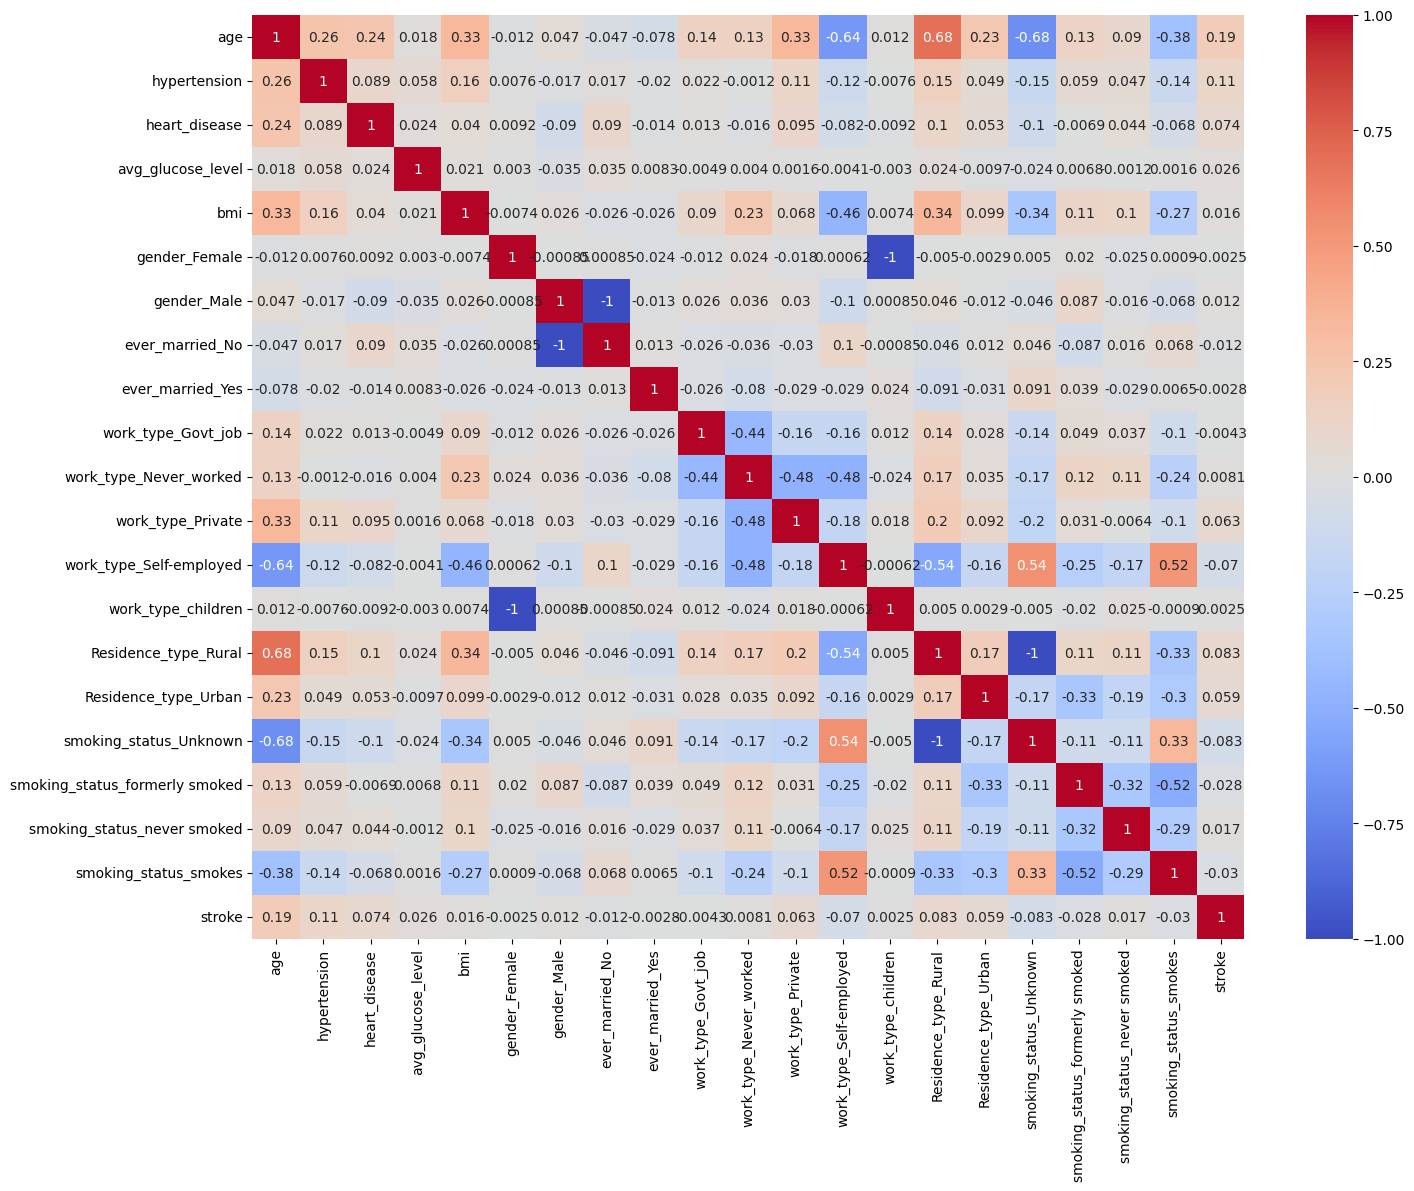

In [31]:
plt.figure(figsize=(16,12))
dataf=pd.merge(original_scale,x,how='inner',right_index=True,left_index=True)
correlation_matrix = dataf.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


**drop one from each two high correlated features**

In [32]:
dataf=dataf.drop(['ever_married_No','work_type_children','smoking_status_Unknown'],axis=1)

In [33]:
X=dataf.iloc[:,:-1]
Y=dataf.iloc[:,-1]

In [34]:
X.shape

(4565, 17)

checking for variance

In [35]:
from sklearn.feature_selection import VarianceThreshold


In [36]:
selector=VarianceThreshold(threshold=(0.01))
data_selected=pd.DataFrame(selector.fit_transform(X))
data_selected.shape

(4565, 16)

In [37]:
selected_features=X.columns[selector.get_support()]
selected_features

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [38]:
final_data_frame=pd.DataFrame(X,columns=selected_features)
final_data_frame.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,80.0,0.0,1.0,105.92,32.5,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,49.0,0.0,0.0,171.23,34.4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,79.0,1.0,0.0,174.12,24.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,81.0,0.0,0.0,186.21,29.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,74.0,1.0,1.0,70.09,27.4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [39]:
Y.value_counts(normalize=True)

stroke
0    0.945455
1    0.054545
Name: proportion, dtype: float64

In [40]:
Y.shape

(4565,)

In [41]:
from imblearn.pipeline import Pipeline 
from sklearn.svm import SVC
from sklearn.preprocessing import PowerTransformer,StandardScaler

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.7, random_state=41, stratify=Y)

In [43]:
y_train.shape

(1369,)

## data preprocessing

In [44]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA


In [45]:
def make_svm_pipe(C=1,kernel='linear',degree=3,class_weight=None,gamma='scale',use_smote=False,use_pca=False,n_components=2):
    model=SVC(C=C,kernel=kernel,degree=degree,class_weight=class_weight,gamma=gamma,probability=True)
    steps=[]
    if use_smote:
        steps.append(('smote',SMOTE(random_state=42)))
    steps.extend( [('transformer',PowerTransformer()),
        ('scaler',StandardScaler())])
    if use_pca:
        steps.append(('pca',PCA(n_components=n_components,random_state=42)))
    
    steps.append(('model',model))
    
    return Pipeline(steps)

pipe line must contain scaler because svm and pca are distance based method
and the transformer must be before the the scaling to reduce the skewness so the outliers don't disturb the model which is distance based 
and the order matters because the transformation function is nonlinear and the scaling is linear 

if I scaled first negative values could be there and box cox will not work

In [46]:
imbalanced_hard_pipe=make_svm_pipe(kernel='linear',class_weight='balanced',C=100)
hard_pipe=make_svm_pipe(kernel='linear',C=100,use_smote=True)
soft_pipe1=make_svm_pipe(kernel='linear',use_smote=True)
imbalanced_soft_pipe1=make_svm_pipe(kernel='linear',use_smote=False,class_weight='balanced')
soft_pipe2=make_svm_pipe(kernel='linear',use_smote=True,C=5)
poly_pipe=make_svm_pipe(kernel='poly',use_smote=True,degree=3)
poly_pipe2=make_svm_pipe(kernel='poly',use_smote=True,degree=2)
rbf_pipe=make_svm_pipe(kernel='rbf',use_smote=True)
rbf_pipe2=make_svm_pipe(kernel='rbf',use_smote=True,gamma='auto')
sigmoid_pipe=make_svm_pipe(kernel='sigmoid',use_smote=True)


In [47]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_score,recall_score,f1_score

In [48]:
pipes = {
    "imbalanced hard": imbalanced_hard_pipe,
    "hard": hard_pipe,
    "soft1": soft_pipe1,
    "imbalanced soft": imbalanced_soft_pipe1,
    "soft2": soft_pipe2,
    "poly1": poly_pipe,
    "poly2": poly_pipe2,
    "rbf1": rbf_pipe,
    "rbf2": rbf_pipe2,
    "sigmoid": sigmoid_pipe
}
y_test_pred={}
y_test_proba={}
y_train_pred={}
y_train_proba={}
models = {}
for name, pipe in pipes.items():
    models[name] = pipe.fit(X_train, y_train)
    y_test_pred[name]=pipe.predict(X_test)
    y_test_proba[name]=pipe.predict_proba(X_test)
    y_train_pred[name]=pipe.predict(X_train)
    y_train_proba[name]=pipe.predict_proba(X_train)

In [49]:
for name, prediction in y_test_pred.items():
    print(name)
    print(classification_report(y_test, prediction, target_names=["stroke", "not stroke"]))
    print("-" * 50)

imbalanced hard
              precision    recall  f1-score   support

      stroke       0.97      0.74      0.84      3022
  not stroke       0.12      0.64      0.20       174

    accuracy                           0.73      3196
   macro avg       0.55      0.69      0.52      3196
weighted avg       0.93      0.73      0.80      3196

--------------------------------------------------
hard
              precision    recall  f1-score   support

      stroke       0.95      0.99      0.97      3022
  not stroke       0.14      0.02      0.03       174

    accuracy                           0.94      3196
   macro avg       0.54      0.51      0.50      3196
weighted avg       0.90      0.94      0.92      3196

--------------------------------------------------
soft1
              precision    recall  f1-score   support

      stroke       0.95      0.92      0.94      3022
  not stroke       0.13      0.20      0.15       174

    accuracy                           0.88      3196

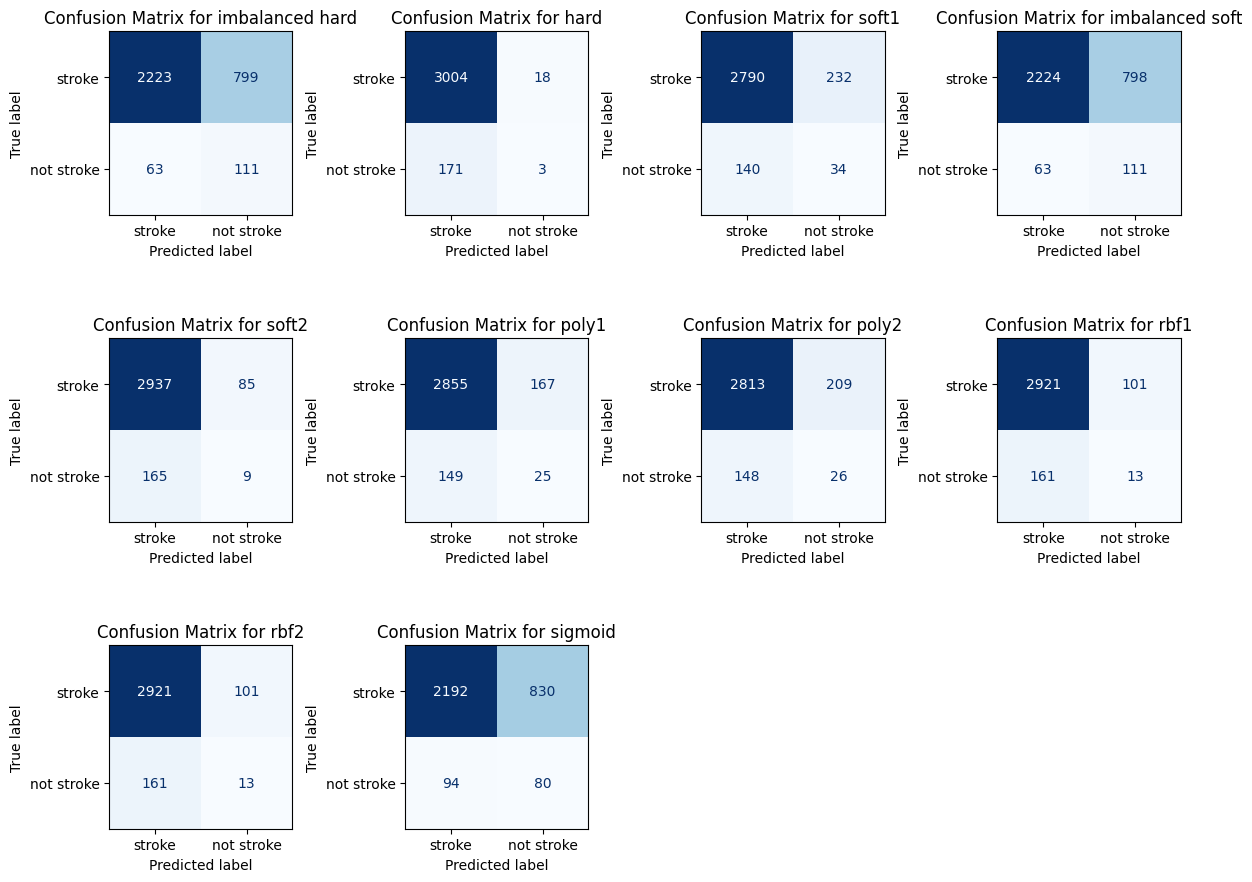

In [50]:
plt.figure(figsize=(4*3,4*3))
for i,(name,prediction) in enumerate(y_test_pred.items()):
    ax=plt.subplot(4,4,i+1)
    cm = confusion_matrix(y_test, prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['stroke','not stroke'])
    disp.plot(cmap='Blues', ax=ax, colorbar=False)
    ax.set_title(f"Confusion Matrix for {name}")
plt.tight_layout()
plt.show()

In [51]:
from sklearn.metrics import roc_auc_score

In [52]:
y_test.shape

(3196,)

In [53]:
test_result=[]
train_result=[]
for _,proba in y_test_proba.items():
    test_result.append({"test_roc_auc_score": roc_auc_score(y_test,proba[:,1],average='macro')})
for _,proba in y_train_proba.items():
    train_result.append({"train_roc_auc_score": roc_auc_score(y_train,proba[:,1],average='macro')})

test_result=pd.DataFrame(test_result,index=y_test_proba.keys())
train_result=pd.DataFrame(train_result,index=y_train_proba.keys())

result=pd.concat([test_result,train_result],axis=1).sort_values(by='test_roc_auc_score',ascending=False)
display(result)

,test_roc_auc_score,train_roc_auc_score
imbalanced hard,0.724252,0.768006
imbalanced soft,0.724098,0.768099
soft1,0.664946,0.719897
soft2,0.659023,0.713673
poly1,0.643807,0.928171
sigmoid,0.643322,0.518743
hard,0.635849,0.692983
rbf2,0.624915,0.934632
rbf1,0.624913,0.934632
poly2,0.569042,0.843555


notice that the best models at ranking are the ones with class weight='balanced'
sometimes balanced class weights can beat oversampling unless the minority isn't too small 


also we can notice that the rbf and polynomial kernel models have been overfitted on the training data 

In [54]:
test_result=[]
train_result=[]
for key in y_test_proba:
    proba=y_test_proba[key]
    prediction=y_test_pred[key]
    test_result.append({
        "test_roc_auc_score": roc_auc_score(y_test,proba[:,1],average='macro'),
        "Model": key,
        "Accuracy": accuracy_score(y_test, prediction),
        "Precision": precision_score(y_test, prediction, average='weighted'),
        "Recall": recall_score(y_test, prediction, average='weighted'),
        "F1 Score": f1_score(y_test, prediction, average='weighted')
        })
for key in y_train_proba:
    proba=y_train_proba[key]
    prediction=y_train_pred[key]
    train_result.append({
        "test_roc_auc_score": roc_auc_score(y_train,proba[:,1],average='macro'),
        "Model": key,
        "Accuracy": accuracy_score(y_train, prediction),
        "Precision": precision_score(y_train, prediction, average='weighted'),
        "Recall": recall_score(y_train, prediction, average='weighted'),
        "F1 Score": f1_score(y_train, prediction, average='weighted')
        })

In [55]:
test_result_df=pd.DataFrame(test_result).set_index("Model").sort_values(by="F1 Score",ascending=False)
train_result_df=pd.DataFrame(train_result).set_index("Model").sort_values(by="F1 Score",ascending=False)
display(test_result_df)

,test_roc_auc_score,Accuracy,Precision,Recall,F1 Score
Model,,,,,
hard,0.635849,0.940864,0.902408,0.940864,0.918394
soft2,0.659023,0.921777,0.900474,0.921777,0.910613
rbf1,0.624913,0.918023,0.902371,0.918023,0.909886
rbf2,0.624915,0.918023,0.902371,0.918023,0.909886
poly1,0.643807,0.901126,0.905746,0.901126,0.903410
poly2,0.569042,0.888298,0.904319,0.888298,0.896058
soft1,0.664946,0.883605,0.907336,0.883605,0.894874
imbalanced soft,0.724098,0.730601,0.926158,0.730601,0.803369
imbalanced hard,0.724252,0.730288,0.926139,0.730288,0.803152


here the smote models win.
it depends on the application to choose the metric 
here I will choose f1 as a criterion because we want to catch all strokes

It is prefered to not consider the accuracy as an evaluation metric with imbalanced data because it could be misleading

In [56]:
display(train_result_df)

,test_roc_auc_score,Accuracy,Precision,Recall,F1 Score
Model,,,,,
rbf1,0.934632,0.954711,0.951481,0.954711,0.952847
rbf2,0.934632,0.954711,0.951481,0.954711,0.952847
poly1,0.928171,0.943755,0.947659,0.943755,0.945556
poly2,0.843555,0.921110,0.936558,0.921110,0.927874
hard,0.692983,0.943755,0.915756,0.943755,0.921763
soft2,0.713673,0.924763,0.908781,0.924763,0.916163
soft1,0.719897,0.897736,0.910410,0.897736,0.903837
imbalanced hard,0.768006,0.730460,0.927932,0.730460,0.803179
imbalanced soft,0.768099,0.728999,0.927847,0.728999,0.802160


rbf has a little overfitting

In [57]:
def plot_svm_decision_boundary(pipe, X, y, title="Decision Boundary"):
    # split pipeline into preprocessing and model
    steps_no_smote = [(name, step) for name, step in pipe.steps 
                      if name not in ["smote", "model"]]
    preproc = Pipeline(steps_no_smote)    
    model   = pipe[-1]    # the classifier

    # get 2D features (fit preprocessing, then transform)
    X_2d = preproc.fit_transform(X, y)

    # fit full pipeline (with model)
    pipe.fit(X_2d, y)

    # grid
    h = 0.02  
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points)   # already in PCA space
    Z = Z.reshape(xx.shape)

    # plot
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.grid(True)
    plt.show()


In [58]:
pca_soft_pipe=make_svm_pipe(kernel='linear',use_smote=True,use_pca=True)
pca_poly_pipe=make_svm_pipe(kernel='poly',use_smote=True,degree=3,use_pca=True)
pca_rbf_pipe=make_svm_pipe(kernel='rbf',use_smote=True,gamma='auto',use_pca=True)

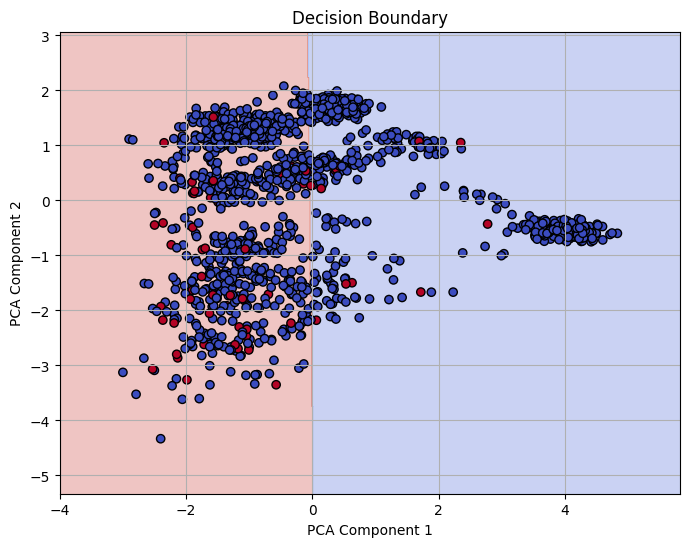

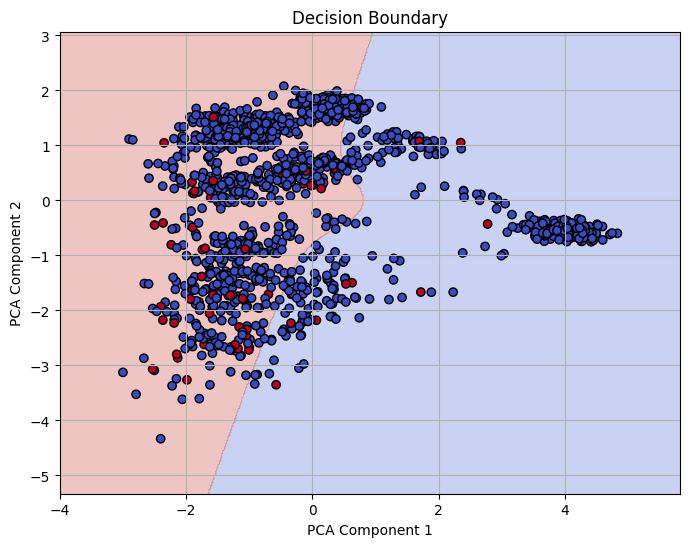

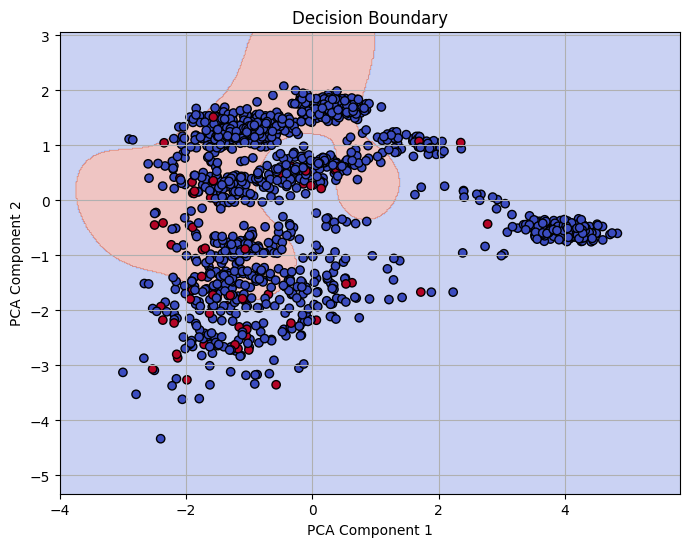

In [59]:
plot_svm_decision_boundary(pca_soft_pipe,X_train,y_train)
plot_svm_decision_boundary(pca_poly_pipe,X_train,y_train)
plot_svm_decision_boundary(pca_rbf_pipe,X_train,y_train)


from the graphs I think that the best model from these three models is the rbf model but don't forget that this is the trainig data and we said before that the rbf models have overfitted